In [1]:
from docarray import DocumentArray

In [2]:
import torch
torch.cuda.empty_cache()

In [3]:
# import glob

# all_images_path = 'C:/Users/gprak/Downloads/Indian_Thai_BankNotes_Dataset/Indian_Thai_BankNotes_Dataset/**/**/**/*.jpg'

# my_list = []
# # root_dir needs a trailing slash (i.e. /root/dir/)
# i = 0
# for filename in glob.iglob(all_images_path, recursive=True):
#     #print(filename)
#     my_list.append(filename)
#     # print(i)
#     i += 1
# print(i)

In [4]:
# import tarfile
# tar = tarfile.open("sample.protobuf.gz", "w:gz")
# for name in my_list:
#     tar.add(name)
# tar.close()

In [5]:
import os,random


In [6]:
cuda2 = torch.device('cuda:0')

In [7]:
#https://github.com/jina-ai/docarray
#https://github.com/jina-ai/finetuner

In [8]:
%%time
# please change the file path to your data path
# def return_data_array(all_images_path):
#     return DocumentArray.from_files(all_images_path)
all_images_path = 'C:/Users/gprak/Downloads/Indian_Thai_BankNotes_Dataset/Indian_Thai_BankNotes_Dataset/**/**/**/*.jpg'
data = DocumentArray.from_files(all_images_path,sampling_rate=0.1)
print(len(data))
#d_bytes = data.to_bytes()
#d = Document.from_bytes(d_bytes, protocol='protobuf', compress='gzip')

3087
Wall time: 1.67 s


In [9]:
%%time
# take random 300 samples from data 
data1 = data
# data2 = []
# for i in range(int(0.01*len(data))):
#     sample_doc = random.choice(data)
#     sample_doc.text = str(sample_doc.uri).replace("/","\n").replace("\\","\n")
#     #print(sample_doc.text)
#     data2.append(sample_doc)
# print(type(data2))
# #print(data1.get_json_schema)
# print(len(data2))
# data1 = DocumentArray(data2)
print(type(data1))
#print(data[0])

<class 'docarray.array.memory.DocumentArrayInMemory'>
Wall time: 0 ns


In [10]:
data1[12]

📄 Document: 0b5fc048ba26a964d005306619bb1484
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ mime_type │ image/jpeg                                                       │
│ uri       │ C:/Users/gprak/Downloads/Indian_Thai_BankNotes_Dataset/Indian_T… │
╰───────────┴──────────────────────────────────────────────────────────────────╯

In [11]:

data1

╭────────────────── Documents Summary ──────────────────╮
│                                                       │
│   Length                 3087                         │
│   Homogenous Documents   True                         │
│   Common Attributes      ('id', 'mime_type', 'uri')   │
│   Multimodal dataclass   False                        │
│                                                       │
╰───────────────────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    3087             False             │
│   mime_type   ('str',)    1                False             │
│   uri         ('str',)    2001             False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

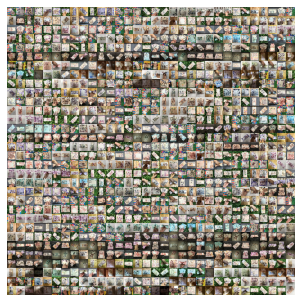

Wall time: 21.8 s


In [12]:
%%time
data1.plot_image_sprites()

In [13]:
# print(len(data))
# print(type(data))
# small_data_chunks=[]
# for i in range(0,len(data),3):
#     #print(i,i+3)
#     small_data_chunks.append(data[i:i+3])
# # print(data.dataloader)
# #print(data[30000-1])
# print(small_data_chunks[0])

In [14]:
#data = DocumentArray.load_binary('sample.protobuf.gz')


In [15]:
%%time
from docarray import Document

#x=len(data)
# def preproc(d: Document):
#     return (
#         d.load_uri_to_image_tensor()  # load
# #         .set_image_tensor_shape(shape=(10000, 3))
#         .set_image_tensor_normalization()  # normalize color
#         .set_image_tensor_channel_axis(-1, 0)
#     )  # switch color axis for the PyTorch model later
def preproc(d: Document):
    return (
        d.load_uri_to_image_tensor()  # load
        .set_image_tensor_normalization()  # normalize color
        .set_image_tensor_channel_axis(-1, 0)
    )  # switch color axis for the PyTorch model later

def cpu_job(da):
    time.sleep(2)
    print('cpu job done')
    return da

def small_apply_function(data):
    data.apply(preproc,show_progress=True)
    
#small_data_chunks[0].apply(preproc,show_progress=True)
# i=1
# for small_data_chunk in small_data_chunks:
#     print(i)
#     small_data_chunk.apply(preproc)
#     i+=1

# for d in data:
#     preproc(d)
data1.apply(preproc,show_progress=True)
# for da in DocumentArray.dataloader('sample.protobuf.gz',
#                           func=cpu_job,
#                           batch_size=32,
#                           show_progress=False,
#                           num_worker=64):
#     preproc(da)


Output()

Wall time: 1min 5s


╭─────────────────────── Documents Summary ───────────────────────╮
│                                                                 │
│   Length                 3087                                   │
│   Homogenous Documents   True                                   │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri')   │
│   Multimodal dataclass   False                                  │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   id          ('str',)       3087             False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   3087             False             │
│   uri         ('str',)       2001             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [16]:
# data.apply(
#         lambda d: d.set_image_tensor_channel_axis(
#             0, -1
#         ).set_image_tensor_inv_normalization()
#     )

In [17]:
# data.plot_image_sprites(channel_axis=-1)

# small_data_chunks -> list(DocumentArray) where each len(DocumentArray)=3


In [18]:
%%time
import torchvision

resnet = torchvision.models.resnet50(pretrained=True)  # load ResNet50


Wall time: 2.24 s


In [19]:
# import finetuner as ft

# tuned_model = ft.fit(
#     model=resnet,
#     train_data=data,
#     loss='TripletLoss',
#     epochs=20,
#     device='cuda',
#     batch_size=8,
#     to_embedding_model=True,
#     input_size=(3, 224, 224), # for keras use (224, 224, 3)
#     freeze=False,
# )

In [20]:
%%time
#data = DocumentArray.load_binary('sample.protobuf.gz')
data1.embed(resnet,device='cuda',batch_size=8)
    
#data.embed(resnet,device='cuda',batch_size=8)
#data.embed(model,device=cuda2)
# data.embed(tuned_model,device='cuda',batch_size=8)  # embed via GPU to speed up
#data.embed(model)

Wall time: 10min 3s


╭───────────────────────────── Documents Summary ──────────────────────────────╮
│                                                                              │
│   Length                 3087                                                │
│   Homogenous Documents   True                                                │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'embedding')   │
│   Multimodal dataclass   False                                               │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('Tensor',)    3087             False             │
│   id          ('str',)       3087             False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   3087             False             │
│   uri         ('str',)       2001             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [21]:
data1[0]


📄 Document: 087acfbcf9554e40fe976e057c28ead7
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tensor    │ <class 'numpy.ndarray'> in shape (3, 1024, 1024), dtype: float32 │
│ mime_type │ image/jpeg                                                       │
│ uri       │ C:/Users/gprak/Downloads/Indian_Thai_BankNotes_Dataset/Indian_T… │
│ embedding │ <class 'torch.Tensor'> in shape (1000,), dtype: float32          │
╰───────────┴──────────────────────────────────────────────────────────────────╯

In [22]:
data1[12]

📄 Document: 0b5fc048ba26a964d005306619bb1484
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tensor    │ <class 'numpy.ndarray'> in shape (3, 1024, 1024), dtype: float32 │
│ mime_type │ image/jpeg                                                       │
│ uri       │ C:/Users/gprak/Downloads/Indian_Thai_BankNotes_Dataset/Indian_T… │
│ embedding │ <class 'torch.Tensor'> in shape (1000,), dtype: float32          │
╰───────────┴──────────────────────────────────────────────────────────────────╯

In [23]:
# for i in range(len(data)):
#     data[i].embedding=data[i].embedding.to(dtype=torch.float32)
#x=list(data1[1].embedding)
#x=x.to(dtype=torch.float32)
#print(x.type)
#print(x[0])
#print(type(x[0]))

In [24]:
%%time
# def postproc(d: Document):
#     return (
#             d.set_image_tensor_channel_axis(
#             0, -1
#         ).set_image_tensor_inv_normalization()
#     )
data1.apply(
        lambda d: d.set_image_tensor_channel_axis(
            0, -1
        ).set_image_tensor_inv_normalization()
    )

# for d in data:
#     postproc(d)

Wall time: 51.4 s


╭───────────────────────────── Documents Summary ──────────────────────────────╮
│                                                                              │
│   Length                 3087                                                │
│   Homogenous Documents   True                                                │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'embedding')   │
│   Multimodal dataclass   False                                               │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('Tensor',)    3087             False             │
│   id          ('str',)       3087             False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   3087             False             │
│   uri         ('str',)       2001             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

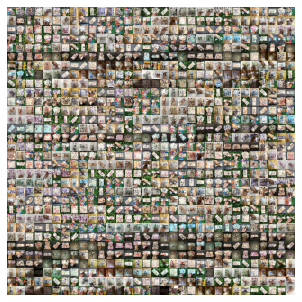

Wall time: 13.9 s


In [25]:
%%time
data1.plot_image_sprites()

In [27]:
#data.plot_embeddings(image_sprites=True)
#data1.plot_embeddings(image_sprites=True,channel_axis=-1)

In [38]:
# query = data1[2]
# data2 = data1
# findings = data2.find(query, metric='euclidean', limit=3)

# #da1.match(da2, metric='euclidean', limit=3)

# #query = da1[2]
# # print(f'query emb = {query.embedding}')
# for m in findings:
#     print('score =', m.scores['euclidean'].value)

score = 0.0
score = 9.830758
score = 11.414573
